## Content
1. https://www.youtube.com/watch?v=SW_wvez0izo&list=PLAwxTw4SYaPkCSYXw6-a_aAoXVKLDwnHK&index=15

In [106]:
from copy import deepcopy

## vISUALIZATIONS

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
%matplotlib widget

In [3]:
# create a uniform distribution array 

# assuming 1-D map of size n
N = 5
world = [1] * N
world = [x/N for x in world]
world = np.asarray(world)

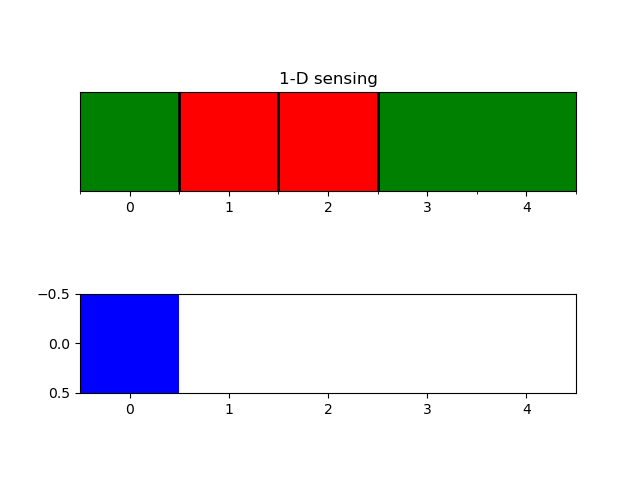

In [27]:
grid = np.zeros((1,N))
# setting colormap
cmap = mpl.colors.ListedColormap(['white','blue','green', 'red'])
bounds=[0,1,2,3,4]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Initializing the world
# walls
grid[0,:] = grid[0,:] + 2
# doors 
grid[0,1:3] = 3

robot_location = 0

fig,ax = plt.subplots(nrows=2, ncols=1);

ax[0].set_title("1-D sensing")
ax[0].get_yaxis().set_visible(False)

im = ax[0].imshow(grid, interpolation='nearest',cmap=cmap, norm=norm)

# Minor ticks
ax[0].set_xticks(np.arange(-.5, N, 1), minor=True)
# ax[0].set_yticks(np.arange(-.5, N, 1), minor=True)

minor_ticks = ax[0].xaxis.get_minor_ticks()

minor_ticks[1].gridline.set_color('black')
minor_ticks[1].gridline.set_linewidth(10)
minor_ticks[1].gridline.set_visible(True)
for i in range(N):
    if grid[0][i] == 3:

        minor_ticks[i].gridline.set_color('black')
        minor_ticks[i].gridline.set_linewidth(2)
        minor_ticks[i].gridline.set_visible(True)

        minor_ticks[i+1].gridline.set_color('black')
        minor_ticks[i+1].gridline.set_linewidth(2)
        minor_ticks[i+1].gridline.set_visible(True)

# ax2
rob_grid = np.zeros_like(grid)
rob_grid[0][robot_location] += 1
cmap2 = mpl.colors.ListedColormap(['white','blue'])
bounds2 =[0,1,2]
norm2 = mpl.colors.BoundaryNorm(bounds, cmap.N)
im = ax[1].imshow(rob_grid, interpolation='nearest',cmap=cmap2, norm=norm2)

plt.show();


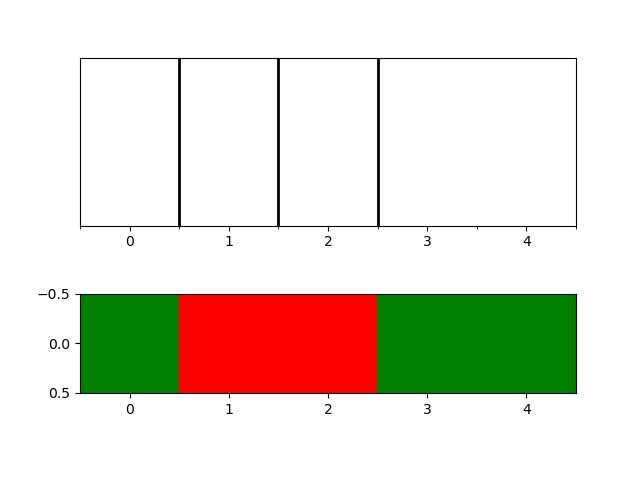

In [19]:
plt.show()

In [36]:
plt.close()

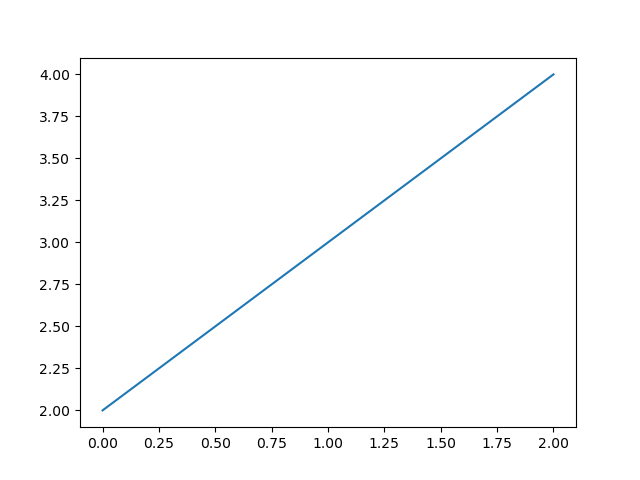

In [5]:
fig, ax = plt.subplots()
plt.plot([2,3,4])
plt.show();

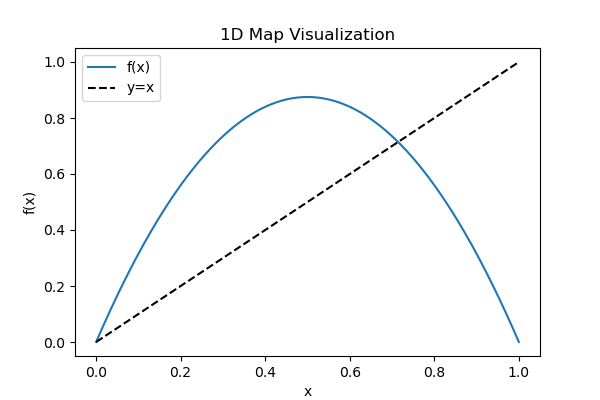

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Logistic map
def f(x, r=3.5):
    return r * x * (1 - x)

x = np.linspace(0, 1, 500)
y = f(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label="f(x)")
plt.plot(x, x, 'k--', label="y=x")  # identity line for fixed points
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("1D Map Visualization")
plt.legend()
plt.show()


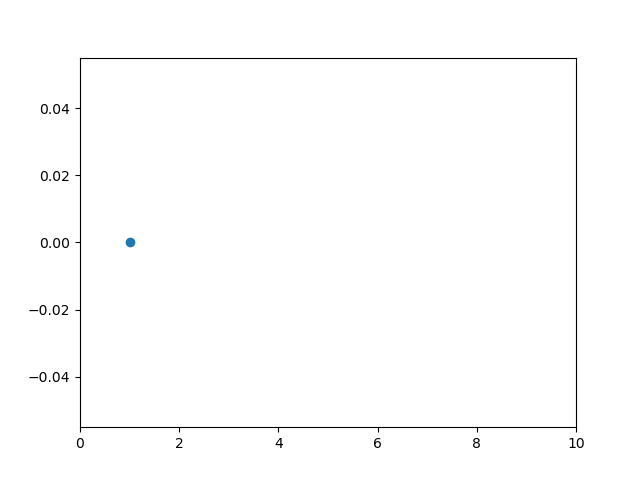

In [25]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim([0, 10])

scat = ax.scatter(1, 0)
x = np.linspace(0, 10)


def animate(i):
    scat.set_offsets((x[i], 0))
    return (scat,)


ani = animation.FuncAnimation(fig, animate, repeat=True, frames=len(x) - 1, interval=50)

# To save the animation using Pillow as a gif
# writer = animation.PillowWriter(fps=15,
#                                 metadata=dict(artist='Me'),
#                                 bitrate=1800)
# ani.save('scatter.gif', writer=writer)

plt.show();


## Course Content

In [116]:
p = [0.2] * 5
world = ['green', 'red', 'red','green','green']
Z = 'green'

# pHit , when measurement = world data, else pMiss
pHit = 0.6
pMiss = 0.2

## --unnormaloized
def sense(p, Z):
    p = np.asarray(p)
    for i, color in enumerate(world):
        p[i] *= pHit if world[i] == Z else pMiss
    return p

def sense2(p, Z):
    q = [1] * len(p)
    for i, color in enumerate(world):
        q[i] = p[i] * pHit if world[i] == Z else p[i] * pMiss
    return q

# normalized
def sense3(p, Z):
    q = [1] * len(p)
    for i, color in enumerate(world):
        hit = (Z == color)
        q[i] = p[i] * (hit* pHit + (1-hit) * pMiss)
    return [x/sum(q) for x in q]

In [117]:
sense3(p,Z)

[0.2727272727272727,
 0.09090909090909093,
 0.09090909090909093,
 0.2727272727272727,
 0.2727272727272727]

### multiple measurements

In [118]:
measurements = ['red', 'green']

curr_prob = p
for i, measurement in enumerate(measurements):
    # print(f"Step {i+1}")
    q = sense3(curr_prob, measurement)
    # print(q)
    curr_prob = q
print(f"Final : {curr_prob}")

Final : [0.20000000000000004, 0.19999999999999996, 0.19999999999999996, 0.20000000000000004, 0.20000000000000004]


In [119]:
p

[0.2, 0.2, 0.2, 0.2, 0.2]

In [120]:
sum(curr_prob)

1.0

### add movement function

In [144]:
def move(p, U):
    """
        p -> input prob distribution of robot location
        U -> no. of units of movement. +ve means robot moves forward by U units
    """
    U = U % len(p)
    q = p[-U:] + p[:-U]
    return q

In [145]:
test = [0,1,0,0,0]
test

[0, 1, 0, 0, 0]

In [142]:
move(test, -4)

[0, 0, 1, 0, 0]

### adding inaccurate motion (overshoot and undershoot probs)

In [161]:
pExact  = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def move2(p, U):
    """
        p -> input prob distribution of robot location
        U -> no. of units of movement. +ve means robot moves forward by U units
    """
    U = U % len(p)
    q = p[-U:] + p[:-U]

    q = [0]*len(p)
    # U = U % len(p)
    # try:
    for i in range(len(p)):
        q[i] += p[(i-U) % len(p)] * pExact
        q[i] += p[(i-U-1) % len(p)] * pOvershoot
        q[i] += p[(i-U+1) % len(p)] * pUndershoot
    return q

In [162]:
test

[0, 1, 0, 0, 0]

In [168]:
move2(test,4)

[0.8, 0.1, 0.0, 0.0, 0.1]

### make robot move twice

In [171]:
p = [0,1,0,0,0]
q = deepcopy(p)
for i in range(1000):
    q = move2(q, 1)
q

[0.20000000000000365,
 0.20000000000000373,
 0.20000000000000365,
 0.2000000000000035,
 0.2000000000000035]

### perform a sense, move, sense, move cycle

In [214]:
p = [0.2] * 5
motion = [1,2]
# use prev measurements

measurements = ['red','red']

prior = deepcopy(p)
for i in range(len(motion)):
    print(f"Measuring {measurements[i]}")
    q = sense3(prior, measurements[i])
    post = move2(q, motion[i])
    prior = post

Measuring red
Measuring red


In [215]:
post

[0.1764705882352941,
 0.058823529411764726,
 0.058823529411764726,
 0.17647058823529418,
 0.5294117647058824]

## 2d sense and move

In [423]:
m = 3
n = 3
p = [[0.2] * n] * m

measurements = ['red', 'red']

motions = [[0,0], [0,1]]

# accuracy of sensor
sensor_right = 0.8

# accuracy of movement
p_move = 1.0

# gkl_added
pExact  = 1
pOvershoot = 0
pUndershoot = 0

colors = [
    ['green', 'green', 'green'],
    ['green', 'red',   'red'],
    ['green', 'green', 'green']
]

Z = 'red'


In [424]:
def move2d(p, motion, p_move=1.0):
    p = deepcopy(p)
    # for motion in motions:
    # # horizontal
    # for i in range(len(p)):
    #     p[i] = move2(p[i], motion[1])
    # #vertical
    # for j in range(len(p[0])):
    #     q = [x[j] for x  in p]
    #     q = move2(q, motion[0])
    #     #assign back values of q to matrix
    #     for i in range(len(p)):
    #         p[i][j] = q[i]
    # return p

    # horizontal 
    # q = []
    q_tot = 0
    q = [[0.0 for col in range(len(p[0]))] for row in range(len(p))]
    
    for i in range(len(q)):
        # q.append([])
        for j in range(len(q[0])):
            # q[i].append(p[i][(j-motion[1]) % len(p[i])] * p_move)
            # q[i][j] += p[i][j] * (1 - p_move)
            # q_tot += q[i][j]
            q[i][j] = p_move * p[(i - motion[0]) % len(p)][(j - motion[1]) % len(p[0])] + \
                        (1-p_move) * p[i][j]
        

    # for i in range(len(p)):
    return q
            


In [425]:
def sense2d(p, Z):
    p = deepcopy(p)
    total = 0
    for i in range(len(p)):
        for j in range(len(p[0])):
            
            hit = int(colors[i][j] == Z)
            p[i][j] = hit * sensor_right + (1-hit)*(1-sensor_right)
            total += p[i][j]

    # normalize to 1
    for i in range(len(p)):
        for j in range(len(p[0])):
            p[i][j] /= total

    return p

In [426]:
def sense2d_2(p, Z, sensor_weight = sensor_right):
    p = deepcopy(p)

    # distribution of Z after sensing
    p_z = []
    p_z_total = 0
    for i in range(len(colors)):
        p_z.append([])
        for j in range(len(colors[0])):
            hit = colors[i][j] == Z
            prob = p[i][j] * (hit * sensor_weight + (1-hit) * (1-sensor_weight) )
            p_z[i].append( prob)
            p_z_total += prob
            
    # normalize p_z
    for i in range(len(colors)):
        for j in range(len(colors[0])):
            p_z[i][j] /= p_z_total

    # # print(p_z)
    # # multiply probs
    # p_tot = 0
    # for i in range(len(p)):
    #     for j in range(len(p[0])):
    #         p[i][j] *= p_z[i][j]
    #         p_tot += p[i][j]
    # #normlize
    # for i in range(len(p)):
    #     for j in range(len(p[0])):
    #         p[i][j] /= p_tot

    return p_z

    
    

In [427]:
def show(p):
    for i in range(len(p)):
        print(p[i])

In [428]:
colors = [['green', 'green', 'green'],
          ['green', 'red',   'red'],
          ['green', 'green', 'green']]

measurements = ['red', 'red']

motions = [[0, 0],[0,1]]

sensor_right = 1
p_move = 0.5


In [429]:
colors = [
    ['red', 'green', 'green', 'red', 'red'],
    ['red', 'red',   'green', 'red', 'red'],
    ['red', 'red',   'green', 'green', 'red'],
    ['red', 'red',   'red',   'red',   'red']
]

measurements = ['green', 'green', 'green', 'green', 'green']

motions = [[0, 0], [0, 1], [1, 0], [1, 0], [0, 1]]

sensor_right = 0.7
p_move = 0.8


In [430]:

m = len(colors)
n = len(colors[0])

In [431]:
pinit = 1/(m*n)
test = [[pinit] * n for i in range(m)]
# test[1][1] = 1

q = test
print("Initial belief")
show(q)
for i in range(len(motions)):
    q = move2d(q, motions[i], p_move=p_move)
    print(f"{i+1}. After move: {motions[i]}\n")
    show(q)
    q = sense2d_2(q, measurements[i], sensor_weight=sensor_right)
    print(f"{i+1}. After sense: {measurements[i]}\n")
    show(q)
print(f"Final q: \n")
show(q)

Initial belief
[0.05, 0.05, 0.05, 0.05, 0.05]
[0.05, 0.05, 0.05, 0.05, 0.05]
[0.05, 0.05, 0.05, 0.05, 0.05]
[0.05, 0.05, 0.05, 0.05, 0.05]
1. After move: [0, 0]

[0.05, 0.05, 0.05, 0.05, 0.05]
[0.05, 0.05, 0.05, 0.05, 0.05]
[0.05, 0.05, 0.05, 0.05, 0.05]
[0.05, 0.05, 0.05, 0.05, 0.05]
1. After sense: green

[0.03749999999999999, 0.08749999999999997, 0.08749999999999997, 0.03749999999999999, 0.03749999999999999]
[0.03749999999999999, 0.03749999999999999, 0.08749999999999997, 0.03749999999999999, 0.03749999999999999]
[0.03749999999999999, 0.03749999999999999, 0.08749999999999997, 0.08749999999999997, 0.03749999999999999]
[0.03749999999999999, 0.03749999999999999, 0.03749999999999999, 0.03749999999999999, 0.03749999999999999]
2. After move: [0, 1]

[0.03749999999999999, 0.04749999999999999, 0.08749999999999997, 0.07749999999999997, 0.03749999999999999]
[0.03749999999999999, 0.03749999999999999, 0.04749999999999999, 0.07749999999999997, 0.03749999999999999]
[0.03749999999999999, 0.03749999

## Programming Gaussian

In [436]:
exp??

Signature: exp(x, /)
Docstring: Return e raised to the power of x.
Type:      builtin_function_or_method

In [437]:
from math import *

def f(mu, sigma2,  x):
    return (1/sqrt(2*pi* sigma2)) * exp((x - mu)**2 / (-2 * sigma2))

In [439]:
f(10,4., 10.)

0.19947114020071635

In [ ]:
b

# Kalman Filter

## Steps

Kalman Filter involves a measurement update step, and a motion update(prediction) step

Measurement Update -> using Bayesian filter (Product)

Motion Update -> using Total Probability (Convolution)

## Measurement Update

Measurement Update is the product of two gaussian probability distributions.

These are prior and measurement gaussian distributions, each having its own mean $\mu$ and variance $\sigma$

### Product of Gaussian distributions

The resultant mean is a precision-weighted average of contributing gaussian distributions.

Precision $\mathbf{p}$ is the inverse of variance $\mathbf{\sigma^2}$, i.e., $$p = \frac{1}{\sigma^2}$$

Resultan mean **in terms of precision:**

$$\mu = \frac{p_1\mu_1 + p_2\mu_2}{p_1 + p_2}$$
Resultant mean **in terms of variance:**
$$\mu = \frac{\sigma_2^2\mu_1 + \sigma_1^2\mu_2}{\sigma_1^2 + \sigma_2^2}$$

Resultant Variance:
$$\sigma^2 = \frac{1}{\frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2} } = \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2 + \sigma_2^2}$$

Resultant Precision:
$$p = p_1 + p_2$$

In [446]:
def update(mean1, var1, mean2, var2):
    mean = (var2*mean1 +var1*mean2)/(var1+var2)
    var = 1/((1/var1) + (1/var2))
    return [mean, var]

In [448]:
update(10.,4.,12.,4)

[11.0, 2.0]

## Motion Update

It is the change in the gaussian probability distribution (of where the robot is), on moving the robot.
This is because the robot movement itself is gaussian with motion having a mean $\nu$ and an uncertainty $\gamma^2$

The resulting prob distribution has a mean
$$\mu_{n+1} = \mu_n + \nu$$

The variance of the resulting distribution is what
$$\sigma_{n+1}^2 = \sigma_n^2 + \gamma^2$$

In [451]:
def predict(mean1, var1, mean2, var2):
    return [mean1+mean2, var1+var2]

In [452]:
predict(10.,4., 12., 4.)

[22.0, 8.0]

## Implementation

In [493]:
# Example
measurements = [5., 6., 7., 9., 10.]
motion = [1., 1., 2., 1., 1.]

# variances
measurement_sig = 4.
motion_sig = 2.

# initial belief
mu = 0. # wrong estimate
sig = 10000. # large uncertainty

sig=0.00000001 

In [494]:
def kalman_basic(initial_belief, z_sig, u_sig, z_list, u_list):
    mu, sig = initial_belief
    for i in range(len(z_list)):
        z = z_list[i]
        u = u_list[i]
        # measurement update
        mu,sig = update(mu, sig, z, z_sig)
        print(f"update:\t[{mu:.12f},\t{sig:.12f}]")
        # motion update
        mu, sig = predict(mu, sig, u, u_sig)
        print(f"predict:[{mu:.12f},\t{sig:.12f}]")
    

In [495]:
kalman_basic([mu, sig], measurement_sig, motion_sig, measurements, motion)

update:	[0.000000012500,	0.000000010000]
predict:[1.000000012500,	2.000000010000]
update:	[2.666666680556,	1.333333337778]
predict:[3.666666680556,	3.333333337778]
update:	[5.181818190496,	1.818181819504]
predict:[7.181818190496,	3.818181819504]
update:	[8.069767446458,	1.953488372439]
predict:[9.069767446458,	3.953488372439]
update:	[9.532163745022,	1.988304093655]
predict:[10.532163745022,	3.988304093655]
